In [118]:
import pandas as pd
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [119]:
data_full = pd.read_csv('Intrahour Volatility Dataset.csv')

In [120]:
X = data_full[["Return_Squared", "Hourly Volatility"]]
Y = data_full["target"]
data_set = data_full[["Date","Return_Squared", "Hourly Volatility", "target"]]

In [121]:
splitlimit = int(len(data_full)*0.8)
training_features, test_features = data_set[:splitlimit], data_set[splitlimit:]

In [122]:
#Outlier Detection in training_data_features

training_features["hourly_volatility_rolling_median"] = training_features["Hourly Volatility"].rolling(window=41, center=True, min_periods=1).median()
training_features["return_squared_rolling_median"] = training_features["Return_Squared"].rolling(window=41, center=True, min_periods=1).median()
training_features["volatility minus median"] = (training_features["Hourly Volatility"] - training_features["hourly_volatility_rolling_median"]).abs()
training_features["return minus median"] = (training_features["Return_Squared"] - training_features["return_squared_rolling_median"]).abs()
volatility_outliers_removed = training_features[~(training_features['volatility minus median'] > 2 * training_features['volatility minus median'].median())]
both_outliers_removed = volatility_outliers_removed[~(volatility_outliers_removed['return minus median'] > 2 * volatility_outliers_removed['return minus median'].median())]

/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_17812/3379916796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_features["hourly_volatility_rolling_median"] = training_features["Hourly Volatility"].rolling(window=41, center=True, min_periods=1).median()
/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_17812/3379916796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_features["return_squared_rolling_median"] = training_features["Return_Squared"].rolling(window=4

In [123]:
X_cleaned = both_outliers_removed[["Return_Squared", "Hourly Volatility"]]
Y_cleaned = both_outliers_removed["target"]
data_set_cleaned = both_outliers_removed[["Date","Return_Squared", "Hourly Volatility", "target"]]

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_data_features_scaled = scaler.fit_transform(X_cleaned)

In [125]:
training_data_scaled = pd.DataFrame(training_data_features_scaled, columns=["Return_Squared", "Hourly Volatility"])

In [126]:
training_data_scaled["target"] = data_set["target"]
training_data_scaled["Date"] = data_set["Date"]
training_data_scaled["Date"] = pd.to_datetime(training_data_scaled["Date"])
training_data_scaled.set_index("Date")
training_data_scaled


,Return_Squared,Hourly Volatility,target,Date
0,0.236245,0.249229,0,2005-01-03 10:00:00
1,0.246650,0.255915,0,2005-01-03 11:00:00
2,0.169128,0.392185,0,2005-01-03 12:00:00
3,0.043624,0.345253,1,2005-01-03 13:00:00
4,0.002453,0.372331,1,2005-01-03 14:00:00
...,...,...,...,...
27758,0.030431,0.066381,1,2012-12-14 07:00:00
27759,0.009510,0.166421,1,2012-12-14 08:00:00
27760,0.002704,0.121478,1,2012-12-14 09:00:00
27761,0.027445,0.164887,0,2012-12-14 10:00:00


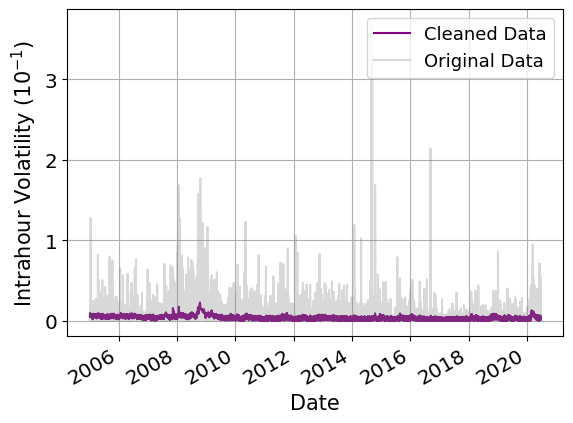

In [127]:
df1 = pd.DataFrame(data_set_cleaned)
df2 = pd.DataFrame(training_features)

df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)
df_aggregated_1 = (df1.resample('M').mean())



df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)
df_aggregated_2 = (df2.resample('M').mean())

df1["Hourly Volatility"] =df1["Hourly Volatility"]*10
df2["Hourly Volatility"] = df2["Hourly Volatility"]*10



#df_aggregated_1["Hourly Volatility"].plot(marker = '', linestyle = '-', color = "red", label = 'Cleaned Data')
#df_aggregated_2["Hourly Volatility"].plot(marker = '', linestyle = '-', color = "cornflowerblue", alpha = 0.4,label = 'Original Data')
df1["Hourly Volatility"].plot(marker = '', linestyle = '-', color = "purple", label = 'Cleaned Data')
df2["Hourly Volatility"].plot(marker = '', linestyle = '-', color = "grey", alpha = 0.3, label = 'Original Data')
plt.gca().tick_params(axis='x', labelsize='x-large')
plt.gca().tick_params(axis='y', labelsize='x-large')
plt.grid(True)
#plt.ylim(0, 0.03)
plt.xlabel("Date", size =15)
plt.ylabel("Intrahour Volatility ($10^{-1}$)", size =15)
plt.legend(fontsize = 13, loc = "upper right")
#plt.savefig('Cleaned Hourly Volatility Data.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


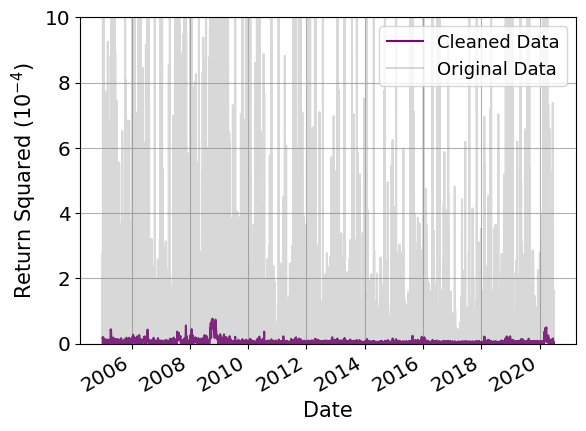

In [128]:
df1 = pd.DataFrame(data_set_cleaned)
df2 = pd.DataFrame(training_features)

df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)
df_aggregated_1 = (df1.resample('M').mean())



df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)
df_aggregated_2 = (df2.resample('M').mean())

df1["Return_Squared"] =df1["Return_Squared"]*10000
df2["Return_Squared"] = df2["Return_Squared"]*10000



#df_aggregated_1["Hourly Volatility"].plot(marker = '', linestyle = '-', color = "red", label = 'Cleaned Data')
#df_aggregated_2["Hourly Volatility"].plot(marker = '', linestyle = '-', color = "cornflowerblue", alpha = 0.4,label = 'Original Data')
df1["Return_Squared"].plot(marker = '', linestyle = '-', color = "purple", label = 'Cleaned Data')
df2["Return_Squared"].plot(marker = '', linestyle = '-', color = "grey", alpha = 0.3, label = 'Original Data')
plt.gca().tick_params(axis='x', labelsize='x-large')
plt.gca().tick_params(axis='y', labelsize='x-large')
plt.grid(True)
plt.ylim(0, 10)
plt.xlabel("Date", size =15)
plt.ylabel("Return Squared ($10^{-4}$)", size =15)
plt.legend(fontsize = 13, loc = "upper right")
#plt.savefig('Cleaned Return Squared Data.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 900x800 with 0 Axes>

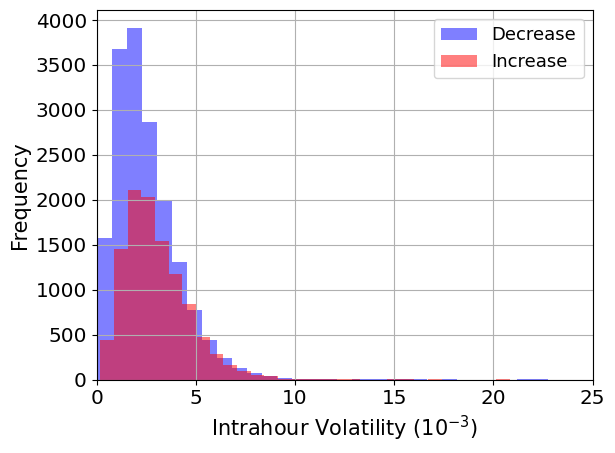

<Figure size 900x800 with 0 Axes>

In [129]:
df1 = pd.DataFrame(data_set_cleaned)
df2 = pd.DataFrame(training_features)

df1["Hourly Volatility"] =df1["Hourly Volatility"]*1000
df2["Hourly Volatility"] = df2["Hourly Volatility"]*1000


#df1["Return_Squared"] =df1["Return_Squared"]*1000000
#df2["Return_Squared"] = df2["Return_Squared"]*1000000

df1[df1['target'] == 0]["Hourly Volatility"].hist(alpha=0.5, color='blue', bins=30, label='Decrease')
df1[df1['target'] == 1]["Hourly Volatility"].hist(alpha=0.5, color='red', bins=30, label='Increase')
#axes[1].set_title('Histogram of Hourly Volatility', size = 15)
#volatility 
plt.xlim(0, 25) 
#plt.ylim(0, 15000) 


plt.gca().tick_params(axis='x', labelsize='x-large')
plt.gca().tick_params(axis='y', labelsize='x-large')
plt.xlabel('Intrahour Volatility ($10^{-3}$)', size = 15)
plt.ylabel('Frequency', size = 15)
plt.legend(fontsize = 13, loc = "upper right")
#plt.savefig('Hourly Volatility Histogram 2.png', format='png', dpi=300, bbox_inches='tight')
plt.figure(figsize=(9,8))

<Figure size 900x800 with 0 Axes>

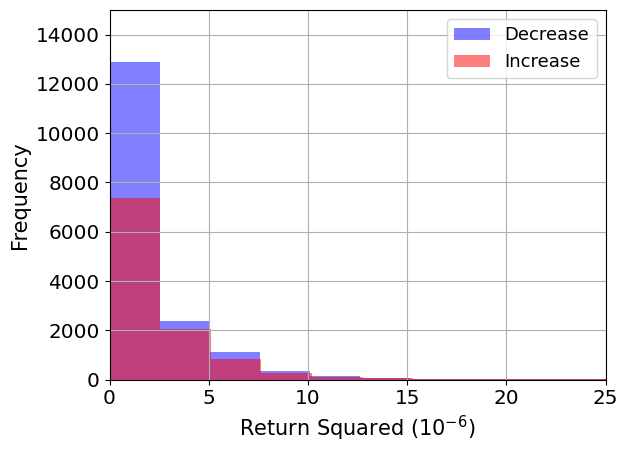

<Figure size 900x800 with 0 Axes>

In [130]:
df1 = pd.DataFrame(data_set_cleaned)
df2 = pd.DataFrame(training_features)

df1["Return_Squared"] =df1["Return_Squared"]*1000000
df2["Return_Squared"] = df2["Return_Squared"]*1000000

df1[df1['target'] == 0]["Return_Squared"].hist(alpha=0.5, color='blue', bins=30, label='Decrease')
df1[df1['target'] == 1]["Return_Squared"].hist(alpha=0.5, color='red', bins=30, label='Increase')
#axes[1].set_title('Histogram of Hourly Volatility', size = 15)
#volatility 
plt.xlim(0, 25) 
plt.ylim(0, 15000) 


plt.gca().tick_params(axis='x', labelsize='x-large')
plt.gca().tick_params(axis='y', labelsize='x-large')
plt.xlabel('Return Squared ($10^{-6}$)', size = 15)
plt.ylabel('Frequency', size = 15)
plt.legend(fontsize = 13, loc = "upper right")
#plt.savefig('Return Squared Histogram 2.png', format='png', dpi=300, bbox_inches='tight')
plt.figure(figsize=(9,8))